In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab

In [171]:
#reading data from a csv file and displaying first 5 rows of a new data frame
url = 'https://raw.githubusercontent.com/joanlenczuk/Titanic---ML-Project/master/titanic_data.csv'
titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [172]:
#nums of raws and columns of the data frame
titanic.shape

(891, 12)

In [173]:
# displaying data types in the data frame
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [174]:
#basic statistics
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exploring the age of passengers

(0, 90)

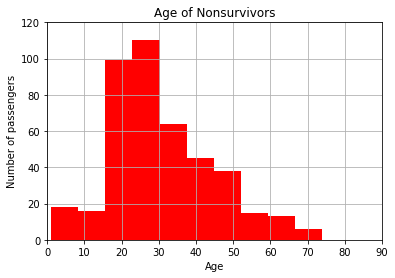

In [175]:
# exploring the age of the passengers who didn't survive
plt.hist(titanic['Age'][titanic['Survived'] == 0], bins = 10, color = 'red', label = 'Age')
plt.xlabel("Age")
plt.ylabel("Number of passengers")
plt.grid(True)
plt.title("Age of Nonsurvivors")
pylab.ylim([0,120])
pylab.xlim([0,90])

- Passengers aged 23-30 y.o. were the most numerous group of the nonsurvivors
- Passengers aged 65-75 y.o. were the least numerous group of the nonsurvivors
- The histogram shows that both children (1-15 y.o.) and people in middle and late adulthood (52-74 y.o.) were the least numerous groups of nonsurvivors

(0, 90)

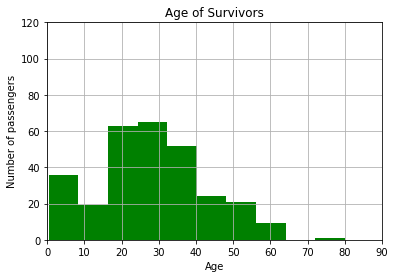

In [176]:
# exploring the age of the passengers who survived
plt.hist(titanic['Age'][titanic['Survived'] == 1], bins = 10, color = 'green')
plt.xlabel("Age")
plt.ylabel("Number of passengers")
plt.grid(True)
plt.title("Age of Survivors")
pylab.ylim([0,120])
pylab.xlim([0,90])

- Although the histogram shows that passengers aged 23-32 y.o. were the most numerous group of the survivors, the number of them was much smaller than the number of nonsurvivors aged 23-30 y.o.
- The group of children aged 1-9 y.o. was more numerous than the group of nonsurvivors of the same age

## Exploring the sex of passengers

In [177]:
#finding out the number of female and male passengers
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

The number of passengers was unequal - there were 314 female passengers and 577 male passengers

In [178]:
# creating a boolean mask from filtered results
mask_fu = (titanic["Sex"] == 'female') & (titanic["Survived"] == 0)

In [179]:
#counting the number of female nonsurvivers
titanic[mask_fu].count()

PassengerId    81
Survived       81
Pclass         81
Name           81
Sex            81
Age            64
SibSp          81
Parch          81
Ticket         81
Fare           81
Cabin           6
Embarked       81
dtype: int64

In [180]:
#counting the number of female survivors
mask_fs = (titanic["Sex"] == 'female') & (titanic["Survived"] == 1)
titanic[mask_fs].count()

PassengerId    233
Survived       233
Pclass         233
Name           233
Sex            233
Age            197
SibSp          233
Parch          233
Ticket         233
Fare           233
Cabin           91
Embarked       231
dtype: int64

Female: nonsurvivors - 81/ survivors - 233

In [181]:
#counting the number of male nonsurvivors
mask_mu = (titanic["Sex"] == 'male') & (titanic["Survived"] == 0)
titanic[mask_mu].count()

PassengerId    468
Survived       468
Pclass         468
Name           468
Sex            468
Age            360
SibSp          468
Parch          468
Ticket         468
Fare           468
Cabin           62
Embarked       468
dtype: int64

In [182]:
#counting the number of male survivors
mask_ms = (titanic["Sex"] == 'male') & (titanic["Survived"] == 1)
titanic[mask_ms].count()

PassengerId    109
Survived       109
Pclass         109
Name           109
Sex            109
Age             93
SibSp          109
Parch          109
Ticket         109
Fare           109
Cabin           45
Embarked       109
dtype: int64

Male: nonsurvivors 468/ survivors 109